In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("input.jpg")

In [4]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [61]:
lower_mask = np.array([6, 100, 64])
upper_mask = np.array([42, 255, 255])

In [62]:
mask = cv2.inRange(img_hsv, lower_mask, upper_mask)
result = cv2.bitwise_and(img, img, mask=mask)

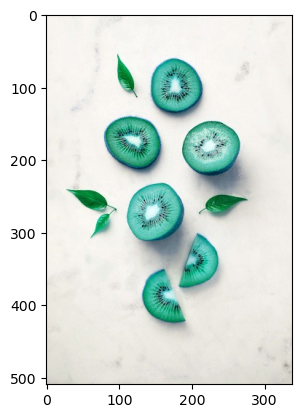

In [63]:
plt.imshow(img)

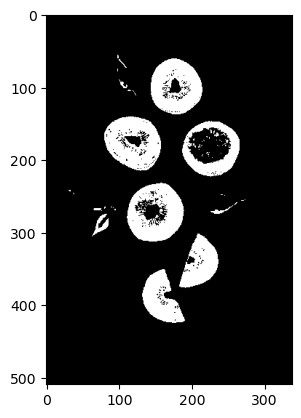

In [64]:
plt.imshow(mask, cmap="gray")

In [80]:
_, thresh = cv2.threshold(mask, 127, 255, 0)

In [81]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [82]:
len(contours)

338

In [83]:
hierarchy

array([[[ 36,  -1,   1,  -1],
        [  2,  -1,  -1,   0],
        [  3,   1,  -1,   0],
        ...,
        [336, 334,  -1, 275],
        [ -1, 335,  -1, 275],
        [ -1, 275,  -1,  -1]]], dtype=int32)

In [84]:
external_contours = np.zeros(mask.shape)

In [85]:
for i in range(len(contours)):

    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external_contours, contours,i, 255, -1)

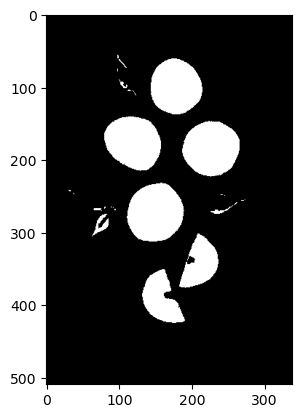

In [86]:
plt.imshow(external_contours, "gray")

In [106]:
kernel = np.ones((3,3))

In [111]:
erode = cv2.erode(external_contours, kernel, iterations = 3)

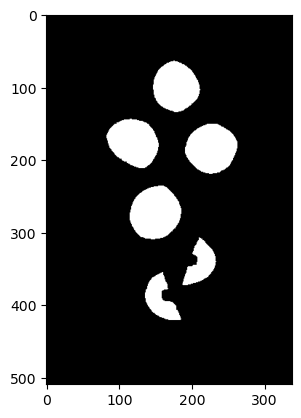

In [112]:
plt.imshow(erode, "gray")

In [113]:
dilate = cv2.dilate(erode, kernel, iterations = 1)

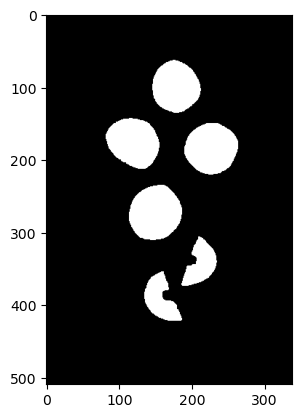

In [114]:
plt.imshow(dilate, "gray")